In [1]:
import pandas as pd
import folium
from geopy.distance import geodesic
from IPython.display import Image, YouTubeVideo
from datetime import date, datetime as dt
import statistics
import matplotlib.pyplot as plt
import requests
import io
import calendar

In [2]:
def FahrenheitToCelsius(fahrenheit):
    return ((fahrenheit - 32) * 5/9).round(2)

Funkcija prima mjesec u obliku broja i vraća medijane.

In [3]:
def getMedianTemperatureInMonth(month):
    averageTemperature=dfWeather.loc[dfWeather['date'].dt.month==month]['average temperature'].to_list()
    medianLow=round(statistics.median_low(averageTemperature),2)
    median=round(statistics.median(averageTemperature),2)
    medianHigh=round(statistics.median_high(averageTemperature),2)
    
    return (medianLow,median,medianHigh)

Funkcija prima temperaturu.
Zanima nas mjesec koji ima najviše dana prosječnu temperaturu višu od neke zadane temperature. Ukoliko takvih mjeseci ima više, gledamo koji ima najvišu prosječnu temperaturu.

In [4]:
def monthAndPercentagesOfDayWithHigherTemperature(temperature):
    numberOfDays=dfWeather['date'].nunique()
    daysWithHigherTemperature=dfWeather.loc[dfWeather['average temperature'] > temperature]['date'].nunique()
    counterDays=0
    avgTemp=0
    month=''
    gb=dfWeather.groupby(dfWeather['date'].dt.month)
    for months in gb.groups:
        dfTemp=gb.get_group(months)
        count=dfTemp.loc[dfTemp['average temperature'] > temperature]['date'].nunique()
        if count > counterDays:
            counterDays=count
            month=months
        elif (count==counterDays & count!=0):
            avg=dfTemp['average temperature'].sum()/dfTemp['date'].nunique()
            if avg > avgTemp:
                avgTemp= avg
                month=months
    percentage = '{0:.2f}%'.format((daysWithHigherTemperature/ numberOfDays)* 100)
    return (percentage, calendar.month_name[month])

In [5]:
def statisticSeason(season):
    gb=dfWeather.groupby(dfWeather['season'])
    dfSeason= gb.get_group(season)
    print("Najviša temperatura: {}" .format(dfSeason['maximum temperature'].max()))
    print("Najniža temperatura: {}".format(dfSeason['minimum temperature'].max()))
    print("Količina padalina: {}".format(dfSeason.loc[dfSeason['precipitation']!='T']['precipitation'].astype(float).sum().round(2)))

### Najgore mećave u New Yorku

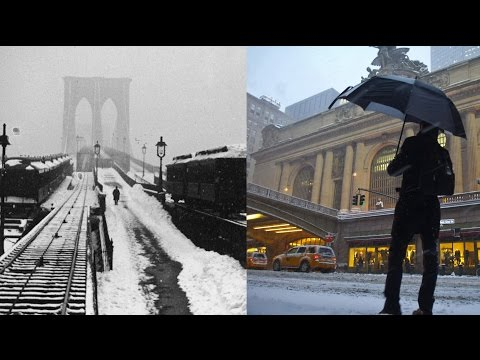

In [6]:
YouTubeVideo('YsfZ8UsVLcc')

### Gdje je uopće New York?

In [7]:
newYorkCoordinates = (40.730610,-73.935242)
newYorkMap=folium.Map(newYorkCoordinates, zoom_start=12)
newYorkMap

In [8]:
url = 'https://raw.githubusercontent.com/pmf-math/weather/main/weather_data_nyc_centralpark_2016.csv'
download = requests.get(url).content
dfWeather = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [9]:
dfWeather['date'] = dfWeather['date'].astype('datetime64[ns]')
dfWeather['maximum temperature']=FahrenheitToCelsius(dfWeather['maximum temperature'])
dfWeather['minimum temperature']=FahrenheitToCelsius(dfWeather['minimum temperature'])
dfWeather['average temperature']=FahrenheitToCelsius(dfWeather['average temperature'])

In [10]:
dfWeather.loc[(dfWeather['date'] < dt(2016,3,21)) | (dfWeather['date'] > dt(2016,12,20)), 'season']="winter"
dfWeather.loc[(dfWeather['date'] > dt(2016,3,20)) & (dfWeather['date'] < dt(2016,6,21)), 'season']="spring"
dfWeather.loc[(dfWeather['date'] > dt(2016,6,20)) & (dfWeather['date'] < dt(2016,9,23)), 'season']="summer"
dfWeather.loc[(dfWeather['date'] > dt(2016,9,22)) & (dfWeather['date'] < dt(2016,12,21)), 'season']="autumn"

In [11]:
dfWeather.sort_values(by='date', inplace=True)

### Općenite informacije o dataframu koji smo dobili iz učitanog csv.

In [12]:
dfWeather.head(10)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,season
0,2016-01-01,5.56,1.11,3.33,0,0,0,winter
31,2016-01-02,15.00,6.67,10.83,0.01,0,2,winter
60,2016-01-03,11.11,3.89,7.50,0,0,0,winter
91,2016-01-04,26.11,16.11,21.11,0.02,0,0,winter
121,2016-01-05,10.56,7.22,8.89,0.16,0,0,winter
152,2016-01-06,28.33,18.89,23.61,0,0,0,winter
182,2016-01-07,26.11,18.89,22.50,0.83,0,0,winter
213,2016-01-08,26.67,20.56,23.61,T,0,0,winter
244,2016-01-09,26.11,20.56,23.33,0.5,0,0,winter
274,2016-01-10,16.67,13.33,15.00,0,0,0,winter


In [13]:
dfWeather.columns

Index(['date', 'maximum temperature', 'minimum temperature',
       'average temperature', 'precipitation', 'snow fall', 'snow depth',
       'season'],
      dtype='object')

In [14]:
dfWeather.shape

(366, 8)

In [15]:
dfWeather.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 8 columns):
date                   366 non-null datetime64[ns]
maximum temperature    366 non-null float64
minimum temperature    366 non-null float64
average temperature    366 non-null float64
precipitation          366 non-null object
snow fall              366 non-null object
snow depth             366 non-null object
season                 366 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 25.7+ KB


Text(0.5, 1.0, 'Prosječna temperatura u New Yorku 2016. godine')

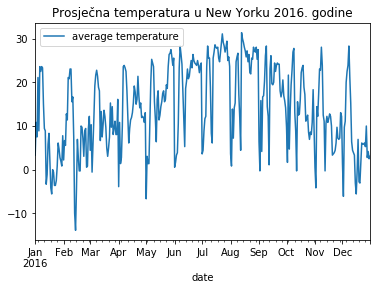

In [16]:
ax=dfWeather.plot(kind='line',x='date',y='average temperature')
plt.title("Prosječna temperatura u New Yorku 2016. godine")

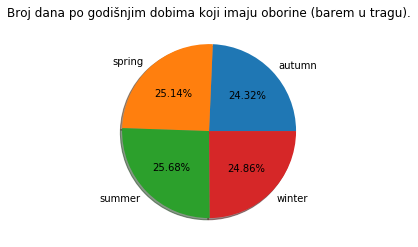

In [17]:
plt.pie(dfWeather.loc[dfWeather['precipitation']!='0.00'].groupby('season')['precipitation'].count(), labels = dfWeather.groupby(["season"]).groups, shadow = True,autopct='%1.2f%%')
plt.title('Broj dana po godišnjim dobima koji imaju oborine (barem u tragu).')
plt.show()

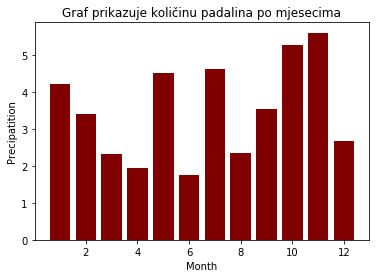

In [18]:
dfWeather.loc[dfWeather['precipitation']!='T']['precipitation'].astype(float).groupby(dfWeather['date'].dt.month).sum()

plt.bar(dfWeather['date'].dt.month.unique(), dfWeather.loc[dfWeather['precipitation']!='T']['precipitation'].astype(float).groupby(dfWeather['date'].dt.month).sum(), color="maroon")
plt.ylabel('Precipatition')
plt.title('Graf prikazuje količinu padalina po mjesecima')
plt.xlabel('Month');

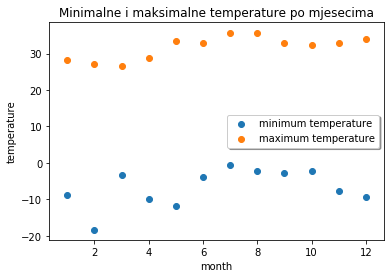

In [19]:
fig,ax=plt.subplots()
ax.set_xlabel("month")
ax.set_ylabel("temperature")
p1=ax.scatter(dfWeather['date'].dt.month.unique(), dfWeather['minimum temperature'].groupby(dfWeather['date'].dt.month).min())
p2=ax.scatter(dfWeather['date'].dt.month.unique(), dfWeather['maximum temperature'].groupby(dfWeather['date'].dt.month).max())
ax.legend((p1, p2), ('minimum temperature', 'maximum temperature'), loc='center right', shadow=True)
plt.title("Minimalne i maksimalne temperature po mjesecima")
plt.show()

### Razmislimo malo o udaljenosti i temperaturi između Zagreba i New Yorka

In [20]:
zagrebCoordinates=(45.815399, 15.966568)

print("Distance between Zagreb and New York is {} km".format(geodesic(newYorkCoordinates,zagrebCoordinates).kilometers))

Distance between Zagreb and New York is 6917.106662757526 km


In [21]:
ZagrebAvgTemp=[0.2, 2.1,6.4,11.3,15.9,19.4,21.1,20.4,16.2,11.0,6.0,1.5]

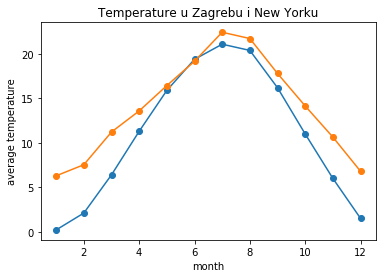

In [22]:
fig,ax=plt.subplots()
ax.plot(dfWeather['date'].dt.month.unique(),ZagrebAvgTemp, marker="o")
ax.plot(dfWeather['date'].dt.month.unique(),dfWeather['average temperature'].groupby(dfWeather['date'].dt.month).mean(),marker="o")
ax.set_xlabel("month")
ax.set_ylabel("average temperature")
plt.title('Temperature u Zagrebu i New Yorku')

plt.show()

In [23]:
monthAndPercentagesOfDayWithHigherTemperature(27)

('7.38%', 'August')

In [24]:
statisticSeason('spring')

Najviša temperatura: 33.33
Najniža temperatura: 23.89
Količina padalina: 8.09


In [25]:
getMedianTemperatureInMonth(11)

(10.83, 10.97, 11.11)